<a href="https://colab.research.google.com/github/KOMBOU12/Marius/blob/main/Projet1_SHAPLEY_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJET 1 : SHAPLEY VALUES**


# 🎯 Objectif : Comprendre le fonctionnement d'un modèle prédictif de Breast Cancer basé sur le Machine Learning (XGBoost)

  ✨  Dans ce tutoriel, nous apprennons à appliquer des méthodes explicables (eXplainable methods) aux modèles de machine learning pour des données tabulaires. L'objectif est de comprendre comment les modèles fonctionnent et quels sont les principaux critères utilisés pour la prise de décision. Étant donné que nous travaillons avec des données tabulaires, nous examinerons un cas d'utilisation très familier.

En particulier, nous allons nous concentrer sur un modèle d'explication spécifique appelé SHapley Additive exPlanations (SHAP) (https://arxiv.org/pdf/1705.07874.pdf). Ce modèle sera implémenté à l'aide du framework développé par Lundberg, disponible sur https://github.com/slundberg/shap.

Basé sur la théorie des jeux, SHAP considère **chaque caractéristique comme un "joueur"** dans un jeu coopératif. En résumé, SHAP quantifie la contribution que chaque caractéristique apporte à la prédiction réalisée par le modèle.

📌  Dans ce notebook, nous apprendrons comment les valeurs SHAP sont calculées mathématiquement à l'aide d'un exemple simple, puis nous nous concentrerons sur une application critique des modèles de machine learning : la prédiction des crises de trouble bipolaire.




### Valeurs de Shapley: Definition

📖 L'une des principales contributions de SHAP est de considérer l'explication comme un modèle en soi. Le modèle explicatif est une fonction linéaire d'une variable binaire :


\begin{equation}
g(z') = \phi_0 + \sum_{i=1}^{M}\phi_i z'_i
\end{equation}

où $z' \in \{0,1\}^M $, M représente le nombre de caractéristiques simplifiées, et $\phi_i \in \; \mathbb{R}$. *z'*
représente le vecteur des caractéristiques simplifiées, et , $\phi_i $ est l'attribution de la caractéristique pour la caractéristique i.

\begin{equation}
\phi_i = \sum_{S \subseteq F \ \{i\}} \frac{\mid S\mid! (\mid F\mid - \mid S\mid - 1)!}{\mid F\mid !} [f_{S \bigcup \{i\}}(x_{S \bigcup \{i\}}) - f_S(x_S)]
\end{equation}

où $f$ représente la fonction du modèle, et $S \subseteq F $, où $F$ représente l'ensemble de toutes les caractéristiques, et $S$ un sous-ensemble de $F$. Les valeurs de Shap sont une moyenne pondérée de toutes les différences possibles entre les sous-ensembles. $\mid S \mid$ représente le nombre d'éléments du sous-ensemble $S$.

La valeur de Shapley est une méthode qui satisfait quatre propriétés : **Efficacité, Symétrie, Neutralité et Additivité.**



📌  **Efficacité** fait référence au fait que la somme des contributions des caractéristiques doit être égale à la différence entre la prédiction pour une instance donnée $x$ et la moyenne des prédictions.

 📌 **Symétrie :** Cette propriété impose que les contributions des valeurs de deux caractéristiques doivent être identiques si elles contribuent de manière identique à toutes les coalitions possibles.

📌 **Additivité :** Pour les algorithmes d'ensemble utilisant le bagging (c'est-à-dire des méthodes qui consistent à entraîner différents modèles sur le jeu de données et à moyenner leurs prédictions), cela signifie que les valeurs de Shap peuvent être calculées en utilisant les valeurs de Shap individuelles de chaque modèle indépendant composant l'algorithme de bagging.

📌 **Neutralité (Dummy) :** Cette propriété garantit que la contribution d'une caractéristique qui n'a aucun effet sur la valeur prédite dans toutes les coalitions auxquelles elle est ajoutée est égale à zéro.



Pour comprendre les valeurs de Shap, leur signification et leur mode de calcul, nous allons considérer un exemple simple : imaginons que nous ayons un modèle (n'importe quel modèle de machine learning) qui calcule la probabilité de ne pas rembourser un crédit, en fonction d'un ensemble de 3 caractéristiques (par exemple, l'âge, la localisation et le revenu).

Les valeurs SHAP considèrent chaque combinaison ou coalition de "joueurs" (c'est-à-dire, les caractéristiques) pour déterminer l'importance d'un seul "joueur" (c'est-à-dire, une caractéristique). Comme nous travaillons avec un ensemble simple de 3 caractéristiques, le nombre de modèles différents que nous devons construire avec des ensembles de caractéristiques différents est de $2^3$. Il est important de souligner que tous les modèles sont construits avec les mêmes hyperparamètres.





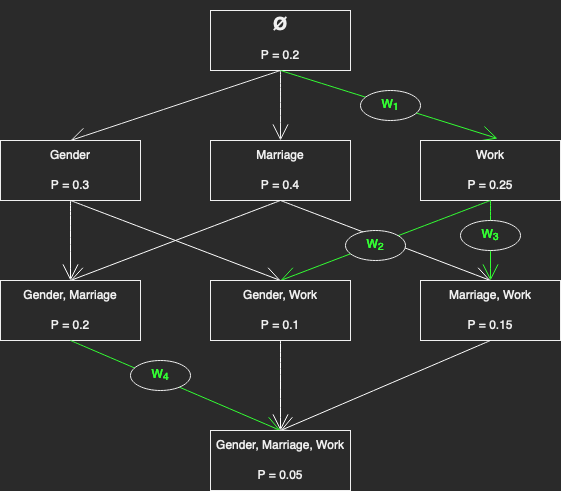

La sortie de l'ensemble vide ($\phi_0)$  correspond au ratio du nombre total de cas appartenant à la classe positive par rapport au nombre total de points de données. Dans cet exemple simple, le nombre de cas positifs est de
0.2.

Maintenant, examinons comment la prédiction du modèle change lorsque nous ajoutons la caractéristique *work* pour un point de données donné
$x$. L'ensemble considéré est l'ensemble vide ($\phi_0)$.


$S_0 = \{\emptyset\}$

$f_{S_0}(x_{S_0}) = 0.2$

$f_{S_0 \bigcup \{work\}}(x_{S_0 \bigcup \{work\}}) = 0.25$

Nous considérons maintenant tous les sous-ensembles de $F$ qui ne contiennent pas la caractéristique *work* ($S \subseteq F \ \{i\}$) et vérifions la différence dans la sortie du modèle lorsque nous prenons en compte le même sous-ensemble, mais en ajoutant la caractéristique *work*.


$S_1 = \{gender\}$

$f_{S_1}(x_{S_1}) = 0.3$

$f_{S_1 \bigcup \{work\}}(x_{S_1 \bigcup \{work\}}) = 0.25$


$S_2 = \{Marriage\}$

$f_{S_2}(x_{S_2}) = 0.4$

$f_{S_2 \bigcup \{work\}}(x_{S_2 \bigcup \{work\}}) = 0.15$

$S_3 = \{Marriage, gender\}$

$f_{S_3}(x_{S_3}) = 0.2$

$f_{S_3 \bigcup \{work\}}(x_{S_3 \bigcup \{work\}}) = 0.05$

Une fois que nous avons trouvé toutes les sorties du modèle pour tous les sous-ensembles différents, nous calculons une moyenne pondérée des sorties du modèle, avec et sans la caractéristique.

Les critères que les poids doivent respecter sont les suivants :
  1. $\sum_{i} w_i = 1$
  2. $w_1 = w_2 + w_3 = w_4$

Comme mentionné précédemment, nous considérons uniquement l'impact de la caractéristique *work* sur le résultat du modèle. Pour obtenir les valeurs de Shap pour les autres caractéristiques, nous répétons la même stratégie.

Appliquons la formule pour obtenir les valeurs de Shap $\phi_i$. Étant donné que nous avons quatre sous-ensembles qui ne contiennent pas la caractéristique *work*, nous allons calculer l'attribution de la caractéristique pour chaque sous-ensemble.


Attribution de la caractéristique pour  $S_0$:

\begin{equation}
\frac{\mid S_0\mid! (\mid F\mid - \mid S_0\mid - 1)!}{\mid F\mid !} [f_{S_0 \bigcup \{i\}}(x_{S_0 \bigcup \{i\}}) - f_{S_0}(x_{S_0})] = \frac{0! (3 - 0 - 1)!}{3!} [0.25-0.2] = \frac{1}{3}0.05
\end{equation}

Nous répétons maintenant le même calcul pour : $S_1$ , $S_2$, et $S_3$

Pour $S_1$: $\frac{1}{6}(-0.05)$

Pour $S_2$: $\frac{1}{6}(-0.25)$

Pour $S_3$: $\frac{1}{3}(-0.15)$

$\phi_i = \frac{1}{3}0.05 + \frac{1}{6}(-0.05) + \frac{1}{6}(-0.25) + \frac{1}{3}(-0.15) = -\frac{1}{6}0.5$

**Cas d'utilisation** : nous avons changé le jeu de données initial pour utiliser le jeu de données **"Breast Cancer"**.

Maintenant que nous savons comment calculer les valeurs Shap pour comprendre le modèle, nous allons nous concentrer sur un cas d'utilisation critique qui impacte directement notre activité économique quotidienne : la prédiction du cancer.


Dans ce notebook, nous allons créer un modèle de prédiction des  **tumeurs bénignes et malignes** en utilisant les données disponibles ici, puis appliquer la méthode XAI SHAP pour aider les médécins à comprendre les causes sous-jacentes du choix de notre modèle

Le cas d'utilisation est organisé comme suit :

1- Nous chargeons les données traitées.

2- Nous développons un modèle basé sur l'apprentissage automatique pour la prédiction des troubles bipolaires : XGBoost.

3- Nous appliquons les valeurs SHAP (https://github.com/slundberg/shap) pour expliquer les sorties du modèle d'apprentissage automatique.

---



# Jeu de données  **Breast Cancer** : le but est de classifier les tumeurs en deux catégories :
#  1- Maligne (cancer dangereux et envahissant).
# 2- Bénigne (tumeur non cancéreuse, donc moins préoccupante).



🧮📊 On commence par importer les bibliothèques

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn import metrics

🤖 On charge le jeu de données **Breast Cancer** fourni par `scikit-learn`.

In [2]:
# Charger le jeu de données
data = load_breast_cancer()

# Créer un DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)


# Ajouter la colonne cible
df['target'] = data.target


# Séparer les features  et la cible
features = df.drop(columns=["target"])
target = df["target"]

Le graphique suivant montre le nombre de cas de tumeurs **bénignes** et **malignes** dans le jeu de données.

<Axes: ylabel='target'>

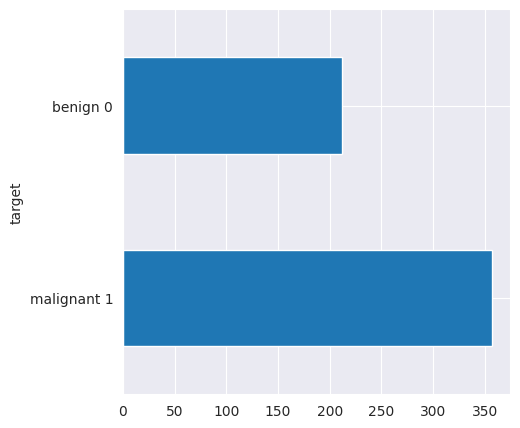

In [3]:
# Configuration de l'affichage
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(5, 5))

# Compter et renommer les classes
counter = target.value_counts()
counter.rename(index={1.0: "malignant 1", 0.0: "benign 0"}, inplace=True)
ax.set_xlabel("# Cases", size=7)
counter.plot(kind="barh", ax=ax)

In [4]:
x, y = features, target

In [5]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,
                                                                    y,
                                                                    test_size=0.3,
                                                                    random_state=80,
                                                                    stratify=target)

Le partie suivante prépare le modèle XGBoost en prenant en compte le déséquilibre des classes pour optimiser ses performances sur le jeu de données.



In [6]:
# Calculer le poids des classes
proportion_class =   counter["malignant 1"]/counter["benign 0"]

# Paramètres XGBoost
params_xgb = {
    "n_estimators": 200,
    "max_depth": 8,
    "learning_rate": 0.05,
    "scale_pos_weight": proportion_class,
}

In [7]:
# Modèle XGBoost
xgb = XGBClassifier(**params_xgb)  # Supprimer "use_label_encoder"
xgb.fit(x_train, y_train)

# Évaluation
y_pred = xgb.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [8]:
y_hat = xgb.predict(x_test)
y_hat = xgb.predict(x_test)
cf = metrics.confusion_matrix(y_pred=y_hat, y_true=y_test)
cf_train = metrics.confusion_matrix(y_pred=xgb.predict(x_train), y_true=y_train)
names_df = [
    "benign",
    "malignant"
]

Text(0.5, 1.0, 'Confusion Matrix (Train set)')

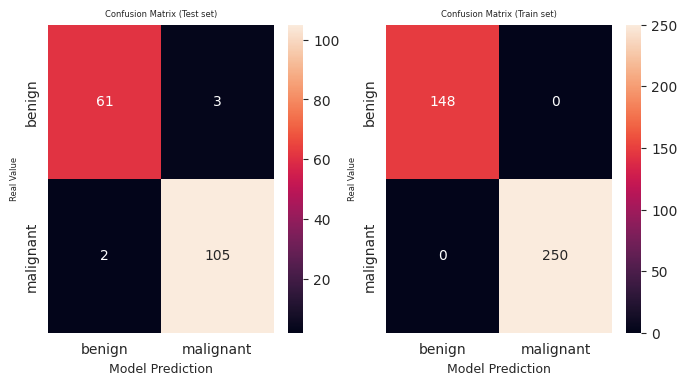

In [9]:
cf_df = pd.DataFrame(data=cf, columns=names_df, index=names_df)
cf_train_df = pd.DataFrame(data=cf_train, columns=names_df, index=names_df)
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

sns.heatmap(cf_df, fmt="d",annot=True, ax=ax[0])
ax[0].set_xlabel("Model Prediction", size=9)
ax[0].set_ylabel("Real Value", size=6)
ax[0].set_title("Confusion Matrix (Test set)", size=6)

sns.heatmap(cf_train_df, fmt="d",annot=True, ax=ax[1])
ax[1].set_xlabel("Model Prediction", size=9)
ax[1].set_ylabel("Real Value", size=6)
ax[1].set_title("Confusion Matrix (Train set)", size=6)


*   Le modèle montre une très bonne précision sur l'ensemble de test (97 %).
*   Les faux négatifs (2) et faux positifs (3) sont très faibles, indiquant une bonne capacité à distinguer les classes.


---




### Configuration de l'environnement

**Répartition de la cible**


- Maligne: **1**

- Begnigne: **0**

## SHAP Values

Nous allons maintenant utiliser ce que nous avons appris des valeurs SHAP pour comprendre le fonctionnement de notre modèle. Nous utilisons le framework développé par Lundberg et al. : https://github.com/slundberg/shap

In [10]:
#Run if shap not installed
! pip install shap

In [11]:
import shap

**Nous allons expliquer le modèle XGBoost. Étant donné que le modèle développé précédemment est basé sur des arbres, nous allons utiliser Tree Explainer, une implémentation rapide pour calculer les valeurs Shap lorsque les modèles sont basés sur des arbres.**

In [12]:
explainer = shap.TreeExplainer(xgb, x, model_output = "raw")
shap_values = explainer.shap_values(x)

**Interprétation locale : Comment interprétons-nous le diagramme de force SHAP ?**

La valeur que nous observons en gras est le logarithme naturel du rapport de cotes $ln(\frac{P(Y=1)}{1-P(Y=1)})$. La valeur de base correspond au rapport de cotes si nous ne prenons en compte que le nombre de cas positifs par rapport au total des instances. Les valeurs de Shapley peuvent être comprises comme des forces qui influencent la sortie du modèle. Les forces des valeurs de Shapley en bleu représentent les caractéristiques qui augmentent la probabilité de défaut, tandis que les valeurs en rouge représentent les caractéristiques qui augmentent la probabilité de présenter une maladie bipolaire.

Un diagramme de force nous permet d'étudier un cas concret afin d'expliquer le diagnostic potentiel d'une maladie bipolaire.


In [13]:
shap.initjs()
patient_index = 11
shap.force_plot(explainer.expected_value, shap_values[patient_index,:], x.iloc[patient_index,:])

💭 Les forces des valeurs de Shapley étant en bleu, nous interpretons que ça  représente les caractéristiques qui augmentent la probabilité de défaut.

In [16]:
# Patient real target value
diagnosis_map = {1.0: "maligne", 0.0: "benign"}

# Afficher le diagnostic réel du patient
print("-------Patient Real Diagnosis------")
real_diagnosis = y.replace(diagnosis_map).iloc[patient_index]
print(real_diagnosis)

# Afficher le diagnostic prédit du patient
print("-------Patient Predicted Diagnosis------")
pred_class = xgb.predict(x.loc[[patient_index], :])[0]

if pred_class == 0.0:
    pred_diagnosis = diagnosis_map[0.0]
    p1 = xgb.predict_proba(x.loc[[patient_index], :])[0][0]
else:
    pred_diagnosis = diagnosis_map[1.0]
    p1 = xgb.predict_proba(x.loc[[patient_index], :])[0][1]

p1_round = round(p1, 3)
print(f'Probability of being diagnosed with a {pred_diagnosis}: {p1_round}')

-------Patient Real Diagnosis------
benign
-------Patient Predicted Diagnosis------
Probability of being diagnosed with a benign: 0.9990000128746033


 Le modèle XGBoost prédit  que la tumeur est bénigne , avec une probabilité extrêmement élevée (99.9 %). Cela indique que le modèle est très confiant dans sa prédiction. Ces résultats sont cohérents avec le diagnostic réel, ce qui valide la performance du modèle pour ce patient

**Interprétabilité globale : Graphique récapitulatif SHAP.**

Le graphique récapitulatif SHAP nous permet de comprendre le modèle en classant les caractéristiques de la plus pertinente à la moins importante. Chaque point de données représente une personne différente. Dans ce cas d'utilisation concret, les caractéristiques les plus pertinentes sont : la variation des mesures d'activité obtenues à partir de la montre actigraphique, ainsi que l'échelle d'évaluation de la dépression de Montgomery-Asberg au moment où l'actigraph a été arrêté. Des valeurs élevées de ces caractéristiques ont un impact négatif sur la sortie du modèle (la probabilité de souffrir d'un trouble bipolaire augmente).

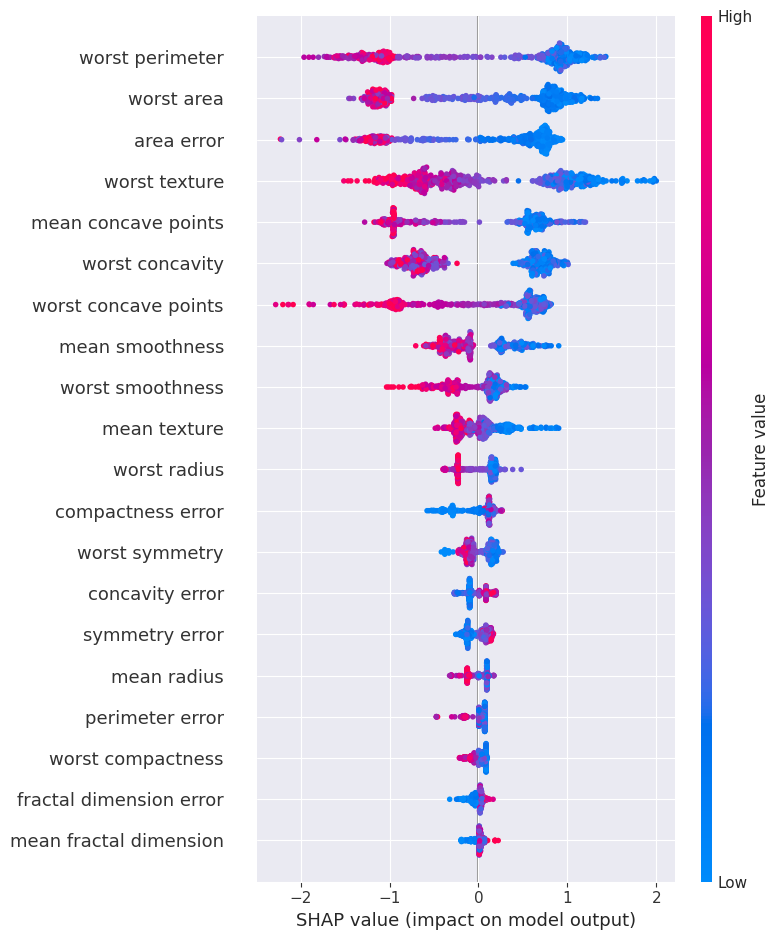

In [17]:
shap.summary_plot(shap_values, x, show=False)

plt.savefig("shap_summary_plot.png", bbox_inches="tight")